In [8]:
import datetime as dt
from datetime import datetime
import sys
import os
import boto3
import pandas as pd
from boto3.session import Session

from io import StringIO
import numpy as np
import shutil

# declaring some constants
bucket = 'arable-adse-dev'
session = Session()
client = session.client('s3')

import json
import psycopg2 as pg
import pandas.io.sql as psql
import warnings
warnings.filterwarnings('ignore')


## import library
import datetime as dt

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning:

The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.



In [9]:
# get access to production data
client = boto3.client('secretsmanager')
response = client.get_secret_value(SecretId='alp-datasci')
a = json.loads(response['SecretString'])

def get_data_prod(query):
    connection = pg.connect(user = a['alp_user'],
                            password = a['alp_pword'],
                            host = a['alp_host'],
                            port = a['alp_port'],
                            database = a['alp_db'])

    df = psql.read_sql('''%s''' % (query), connection)

    connection.close()
    
    return df


client = boto3.client('secretsmanager')
response = client.get_secret_value(SecretId='han-db')
b = json.loads(response['SecretString'])

def get_data_test(query):    
    connection = pg.connect(user = b['user'],
                            password = b['alt_pword'],
                            host = b['alt_host'],
                            port = b['alt_port'],
                            database = b['alt_db'])

    df = psql.read_sql('''%s''' % (query), connection)

    connection.close()
    
    return df

In [10]:
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from matplotlib.dates import DateFormatter
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})
pylab.rcParams['figure.figsize'] = (15, 8)
pylab.rcParams['agg.path.chunksize'] = 10000
import plotly.graph_objects as go

Populating the interactive namespace from numpy and matplotlib


In [11]:
## ET Bug check

device = 'C006338'
start = '2022-03-31'
end = '2022-07-23'

In [12]:
mark_5min = get_data_prod(f"""
        select c.*
        from device_data.calibrated c
        where c.device = '{device}'
        and time >= '{start}'
        and time <= '{end}'
        """)

In [13]:
## hourly data
hourly = get_data_prod(f"""
        select *
        from device_data.hourly
        where device = '{device}'
        and time >= '{start}'
        and time <= '{end}'
        """)

In [14]:
hourly[['time', 'lat','long', 'swdw', 'device', 'et', 'etc','tair','et_version']]

,time,lat,long,swdw,device,et,etc,tair,et_version
0,2022-03-31 00:00:00+00:00,38.86075,-6.66639,0.905836,C006338,NaN,NaN,10.598426,backup: penman-monteith
1,2022-03-31 01:00:00+00:00,38.86075,-6.66639,0.843358,C006338,NaN,NaN,9.771309,backup: penman-monteith
2,2022-03-31 02:00:00+00:00,38.86075,-6.66639,0.877203,C006338,NaN,NaN,9.240090,backup: penman-monteith
3,2022-03-31 03:00:00+00:00,38.86075,-6.66639,0.903007,C006338,NaN,NaN,9.197510,backup: penman-monteith
4,2022-03-31 04:00:00+00:00,38.86075,-6.66639,0.890234,C006338,NaN,NaN,9.292874,backup: penman-monteith
...,...,...,...,...,...,...,...,...,...
2701,2022-07-21 13:00:00+00:00,38.86071,-6.66641,895.529300,C006338,NaN,NaN,34.678520,backup: penman-monteith
2702,2022-07-21 14:00:00+00:00,38.86071,-6.66641,806.574600,C006338,NaN,NaN,35.949820,backup: penman-monteith
2703,2022-07-21 15:00:00+00:00,38.86072,-6.66639,626.165650,C006338,NaN,NaN,36.975090,backup: penman-monteith
2704,2022-07-21 16:00:00+00:00,38.86072,-6.66639,486.579400,C006338,NaN,NaN,37.435196,backup: penman-monteith


In [15]:
sorted_hourly = hourly.sort_values(by=['time'], ascending=True)
sorted_hourly.head()

,time,device,location,b1dw,b1uw,b2dw,b2uw,b3dw,b3uw,b4dw,...,etc,et,rh_at_maxt,vpd,max_tdew,min_rh,low_quality,sample_pct,et_version,update_time
0,2022-03-31 00:00:00+00:00,C006338,607d633c6cd58c000d80ecdb,0.002573,0.001959,0.000940,0.000966,0.001980,0.001524,0.001136,...,NaN,NaN,0.8066,0.218542,8.019889,0.8065,True,1.00,backup: penman-monteith,2022-07-20 21:13:18+00
1,2022-03-31 01:00:00+00:00,C006338,607d633c6cd58c000d80ecdb,0.002381,0.001886,0.000868,0.000977,0.001985,0.001562,0.001124,...,NaN,NaN,0.8632,0.157749,7.826758,0.8581,True,1.00,backup: penman-monteith,2022-07-20 21:13:22+00
2,2022-03-31 02:00:00+00:00,C006338,607d633c6cd58c000d80ecdb,0.002436,0.001993,0.000921,0.000966,0.002007,0.001406,0.001067,...,NaN,NaN,0.8958,0.119446,7.789882,0.8886,True,1.00,backup: penman-monteith,2022-07-20 21:13:26+00
3,2022-03-31 03:00:00+00:00,C006338,607d633c6cd58c000d80ecdb,0.002177,0.001912,0.000922,0.000952,0.001930,0.001477,0.001155,...,NaN,NaN,0.8912,0.115965,7.879028,0.8905,True,0.92,backup: penman-monteith,2022-07-20 21:13:29+00
4,2022-03-31 04:00:00+00:00,C006338,607d633c6cd58c000d80ecdb,0.002374,0.001866,0.000888,0.001001,0.002050,0.001562,0.001120,...,NaN,NaN,0.8799,0.130890,7.708285,0.8767,True,1.00,backup: penman-monteith,2022-07-20 21:13:31+00


In [22]:
filtered_df =sorted_hourly.loc[sorted_hourly["time"].between('2022-07-15', '2022-07-22')]
filtered_df.reset_index(drop=True)
filtered_df['et_version'].unique

<bound method Series.unique of 2544    backup: penman-monteith
2545    backup: penman-monteith
2546    backup: penman-monteith
2547    backup: penman-monteith
2548    backup: penman-monteith
                 ...           
2701    backup: penman-monteith
2702    backup: penman-monteith
2703    backup: penman-monteith
2704    backup: penman-monteith
2705    backup: penman-monteith
Name: et_version, Length: 162, dtype: object>

In [17]:
daily = get_data_prod(f"""
        select *
        from device_data.daily
        where device = '{device}'
        and time >= '{start}'
        and time <= '{end}'
        """)

In [18]:
daily[['device', 'time', 'et','kc', 'etc']])

,device,time,et,kc,etc
0,C006338,2022-03-31 00:00:00+00:00,0.000000,0.378814,0.000000
1,C006338,2022-04-01 00:00:00+00:00,0.000000,0.344619,0.000000
2,C006338,2022-04-02 00:00:00+00:00,0.140981,0.329930,0.048585
3,C006338,2022-04-03 00:00:00+00:00,0.000000,0.329460,0.000000
4,C006338,2022-04-04 00:00:00+00:00,0.000000,0.326921,0.000000


In [26]:
sorted_hourly.loc[sorted_hourly["time"].between('2022-07-15', '2022-07-22')]
daily_filtered = daily.loc[daily['time'].between('2022-07-15', '2022-07-22')]
daily_filtered[['time', 'et','etc']]

,time,et,etc
106,2022-07-15 00:00:00+00:00,0.0,0.0
107,2022-07-16 00:00:00+00:00,0.0,0.0
108,2022-07-17 00:00:00+00:00,0.0,0.0
109,2022-07-18 00:00:00+00:00,0.0,0.0
110,2022-07-19 00:00:00+00:00,0.0,0.0
111,2022-07-20 00:00:00+00:00,0.0,0.0
112,2022-07-21 00:00:00+00:00,0.0,0.0


In [19]:
# figure = go.FigureWidget(
#         data=[
#         go.Scatter(
#             x=daily["time"],
#             y=daily["et"],
#             name=" et0 ",
            
#         ),
#         go.Scatter(
#             x=daily["time"],
#             y=daily["etc"],
#             name=" crop et ",
            
            
#         )
       
               
#         ]
   
#         )
# figure.show()

In [58]:
# fig = px.line(
#     daily, x="time", y="et"
# )
# fig.show()

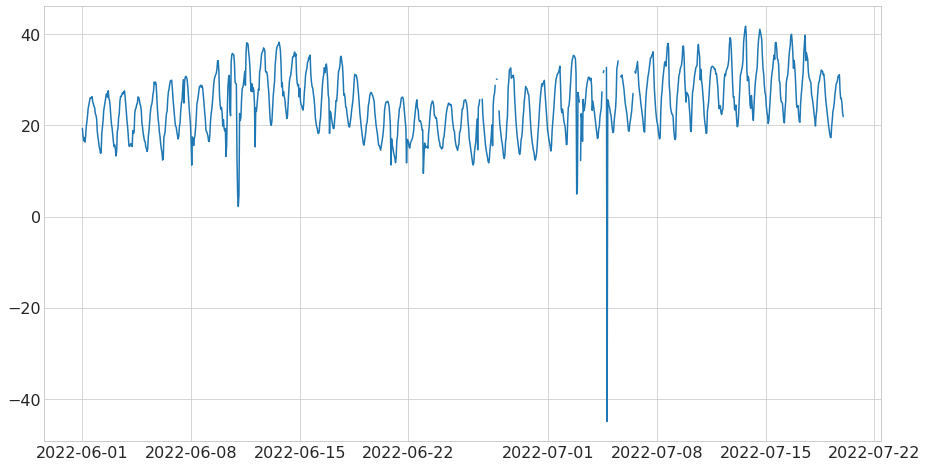

In [43]:
plt.plot(filtered_df['time'], filtered_df['tair'] )

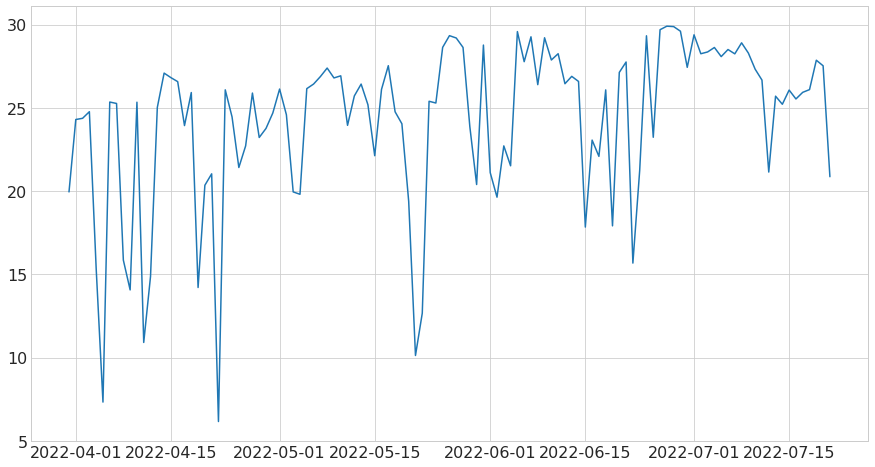

In [44]:
plt.plot(daily['time'], daily['swdw'], label = 'daily' )

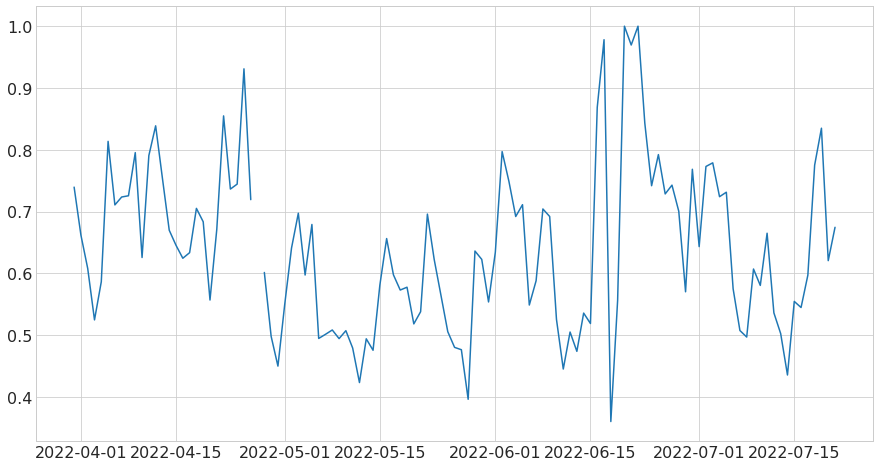

In [45]:
plt.plot(daily['time'], daily['mean_rh'], label = 'daily' )

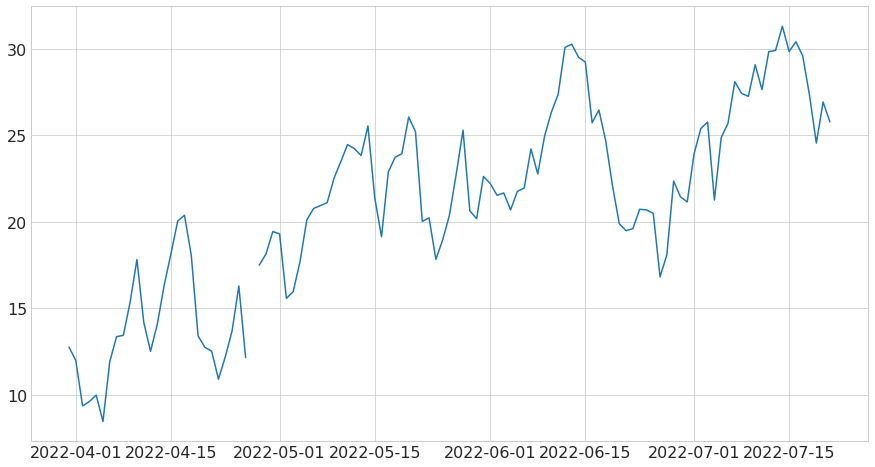

In [39]:
plt.plot(daily['time'], daily['meant'], label = 'daily' )

### pulling data another way

In [27]:
def get_data(table, columns, begin, end, device):
    
#     connection = pg.connect(user = d['username'],
#                             password = d['password'],
#                             host = d['host'],
#                             port = d['port'],
#                             database = d['database'])
    connection = pg.connect(user = d['alp_user'],
                            password = d['alp_pword'],
                            host = d['alp_host'],
                            port = d['alp_port'],
                            database = d['alp_db'])

    df = psql.read_sql(
        "SELECT" + columns + " FROM device_data." + table + " WHERE device = '" + device + "' AND time >= '" + begin +
        "' AND time <= '" + end + "'", connection)

    connection.close()
    
    return df

In [28]:
# use Secrets Manager to grab ALP credentials
client = boto3.client('secretsmanager')
response = client.get_secret_value(SecretId='alp-datasci')
d = json.loads(response['SecretString'])

In [70]:
### get mark data from daily table
device = 'C006338' 
dictionary = {"C006338": ['2022-07-15', '2022-07-20']}
daily = get_data('daily', ' *', dictionary[device][0], dictionary[device][1], device) 

In [74]:
daily[['time', 'device', 'et', 'etc', 'slp', 'ea']]

,time,device,et,etc,slp,ea
0,2022-07-15 00:00:00+00:00,C006338,0.0,0.0,None,2.264245
1,2022-07-16 00:00:00+00:00,C006338,0.0,0.0,None,2.260788
2,2022-07-17 00:00:00+00:00,C006338,0.0,0.0,None,2.425446
3,2022-07-18 00:00:00+00:00,C006338,0.0,0.0,None,2.988560
4,2022-07-19 00:00:00+00:00,C006338,0.0,0.0,None,2.640455
5,2022-07-20 00:00:00+00:00,C006338,0.0,0.0,None,1.992854


In [65]:
### get mark data from daily table
device = 'C006338' 
dictionary = {"C006338": ['2022-07-15', '2022-07-20']}
hourly = get_data('hourly', ' *', dictionary[device][0], dictionary[device][1], device) 

In [69]:
hourly[['time', 'device', 'et', 'etc', 'et_version','slp', 'ea', 'p']]

,time,device,et,etc,et_version,slp,ea,p
0,2022-07-15 00:00:00+00:00,C006338,None,None,backup: penman-monteith,None,1.825037,None
1,2022-07-15 01:00:00+00:00,C006338,None,None,backup: penman-monteith,None,1.749421,None
2,2022-07-15 02:00:00+00:00,C006338,None,None,backup: penman-monteith,None,1.675367,None
3,2022-07-15 03:00:00+00:00,C006338,None,None,backup: penman-monteith,None,1.671145,None
4,2022-07-15 04:00:00+00:00,C006338,None,None,backup: penman-monteith,None,1.800045,None
...,...,...,...,...,...,...,...,...
116,2022-07-19 20:00:00+00:00,C006338,None,None,backup: penman-monteith,None,3.336493,None
117,2022-07-19 21:00:00+00:00,C006338,None,None,backup: penman-monteith,None,3.215144,None
118,2022-07-19 22:00:00+00:00,C006338,None,None,backup: penman-monteith,None,2.939506,None
119,2022-07-19 23:00:00+00:00,C006338,None,None,backup: penman-monteith,None,2.075920,None


In [46]:
### get mark data from daily table
device = 'C006447' 
dictionary = {"C006447": ['2022-07-01', '2022-07-25']}
hourly = get_data('hourly', '*',dictionary[device][0], dictionary[device][1], device) 

In [47]:
hourly

,time,device,location,b1dw,b1uw,b2dw,b2uw,b3dw,b3uw,b4dw,...,etc,et,rh_at_maxt,vpd,max_tdew,min_rh,low_quality,sample_pct,et_version,update_time
0,2022-07-01 00:00:00+00:00,C006447,628f372abb297600100155e6,0.002754,0.002111,0.001272,0.000899,0.001885,0.001229,0.000845,...,0.003280,0.004333,0.6530,0.682993,11.870584,0.6514,True,0.92,20210128_1,2022-07-07 11:26:58+00
1,2022-07-01 01:00:00+00:00,C006447,628f372abb297600100155e6,0.002603,0.002097,0.001216,0.000902,0.001863,0.001243,0.000847,...,0.009462,0.012500,0.6935,0.592125,11.477190,0.6877,True,0.92,20210128_1,2022-07-07 11:27:00+00
2,2022-07-01 02:00:00+00:00,C006447,628f372abb297600100155e6,0.002610,0.001979,0.001226,0.000889,0.001874,0.001195,0.000839,...,0.004794,0.006333,0.7090,0.503244,11.313962,0.7078,True,0.92,20210128_1,2022-07-07 11:27:01+00
3,2022-07-01 03:00:00+00:00,C006447,628f372abb297600100155e6,0.002781,0.002111,0.001190,0.000852,0.001744,0.001122,0.000805,...,0.001514,0.002000,0.7215,0.443819,11.376325,0.7215,True,1.00,20210128_1,2022-07-07 11:27:02+00
4,2022-07-01 04:00:00+00:00,C006447,628f372abb297600100155e6,0.002552,0.001996,0.001330,0.000798,0.001770,0.001100,0.000902,...,0.000757,0.001000,0.7747,0.330525,10.787928,0.7729,True,1.00,20210128_1,2022-07-07 11:27:03+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2022-07-21 13:00:00+00:00,C006447,628f372abb297600100155e6,1.122734,0.037231,1.564723,0.098144,1.396355,0.111736,1.257431,...,0.475339,0.847917,0.2654,4.098576,14.067445,0.2627,False,1.00,20210128_1,2022-07-21 14:49:01+00
494,2022-07-21 14:00:00+00:00,C006447,628f372abb297600100155e6,0.926552,0.035430,1.284654,0.092044,1.215230,0.104704,1.056050,...,0.434462,0.775000,0.2578,4.386616,14.590867,0.2524,False,1.00,20210128_1,2022-07-21 15:46:24+00
495,2022-07-21 15:00:00+00:00,C006447,628f372abb297600100155e6,0.784853,0.030393,1.095354,0.079277,1.043615,0.090321,0.908315,...,0.354437,0.632250,0.2564,4.566863,14.935823,0.2564,False,1.00,20210128_1,2022-07-21 16:47:25+00
496,2022-07-21 16:00:00+00:00,C006447,628f372abb297600100155e6,0.565912,0.024459,0.788613,0.062488,0.763710,0.071403,0.658004,...,0.278663,0.497083,0.2529,4.699092,14.671292,0.2513,False,1.00,20210128_1,2022-07-21 17:47:03+00


In [76]:
import os
import sys
sys.path.append('/home/ec2-user/SageMaker/adse/Met_Facts/et/et_lib/')
sys.path.append('/home/ec2-user/SageMaker/adse/lib')
from et_util.py import *

ModuleNotFoundError: No module named 'et_util.py'; 'et_util' is not a package